In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Inspection

In [2]:
data=pd.read_excel("Risk Measurement Hallerbach - data for group assignment.xlsx",skiprows=9)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7281 entries, 0 to 7280
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7281 non-null   datetime64[ns]
 1   Mkt     7281 non-null   float64       
 2   Tsies   7281 non-null   float64       
 3   CorpIG  7281 non-null   float64       
 4   CorpHY  7281 non-null   float64       
 5   AR      7281 non-null   float64       
 6   Oil     7281 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 398.3 KB


We see that there is no missing data in the dataframe

In [4]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data

,Mkt,Tsies,CorpIG,CorpHY,AR,Oil
date,,,,,,
1994-12-30,1.000000,1.000000,1.000000,1.000000,1.000000,17.77
1995-01-03,0.997600,0.997267,0.997864,1.000572,1.008810,17.45
1995-01-04,1.001092,1.001366,1.001542,1.002199,1.015014,17.56
1995-01-05,1.000791,0.997262,0.999229,1.004223,1.014720,17.76
1995-01-06,1.002793,0.997943,1.000934,1.002199,1.013431,17.69
...,...,...,...,...,...,...
2023-11-24,16.959925,1.238759,4.554430,6.677048,8.169667,74.83
2023-11-27,16.924479,1.246711,4.586613,6.691299,8.159373,74.46
2023-11-28,16.938187,1.251725,4.599442,6.709730,8.155375,76.09


we rebase the oil to have an index like the others.

In [5]:
data2=data.copy()
for i in range (len(data2)):
    data2['Oil'].iloc[i]=data['Oil'].iloc[i]/data['Oil'].iloc[0]

In [6]:
data2

,Mkt,Tsies,CorpIG,CorpHY,AR,Oil
date,,,,,,
1994-12-30,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1995-01-03,0.997600,0.997267,0.997864,1.000572,1.008810,0.981992
1995-01-04,1.001092,1.001366,1.001542,1.002199,1.015014,0.988182
1995-01-05,1.000791,0.997262,0.999229,1.004223,1.014720,0.999437
1995-01-06,1.002793,0.997943,1.000934,1.002199,1.013431,0.995498
...,...,...,...,...,...,...
2023-11-24,16.959925,1.238759,4.554430,6.677048,8.169667,4.211030
2023-11-27,16.924479,1.246711,4.586613,6.691299,8.159373,4.190208
2023-11-28,16.938187,1.251725,4.599442,6.709730,8.155375,4.281936


# Check for outliers

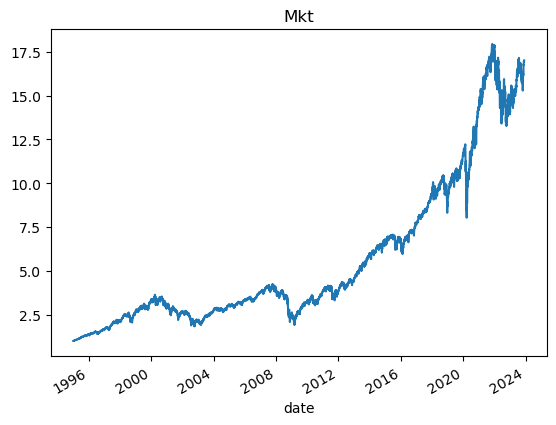

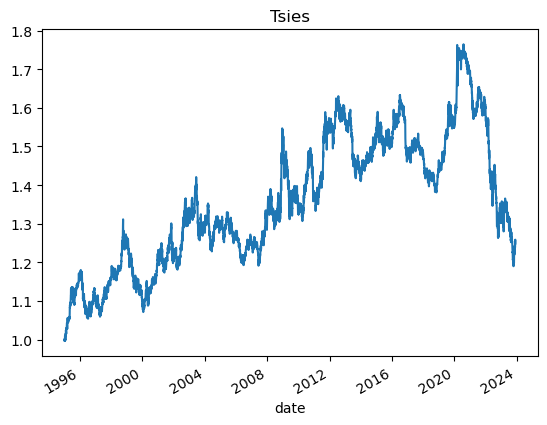

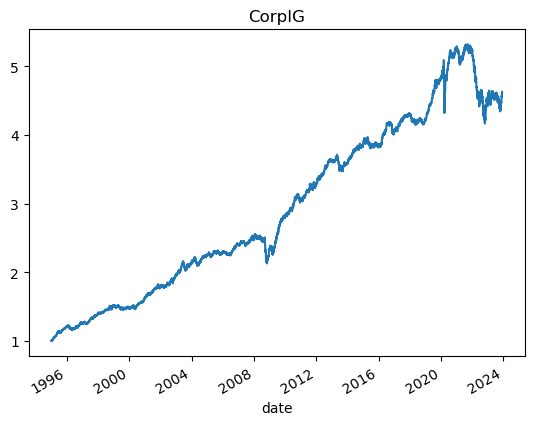

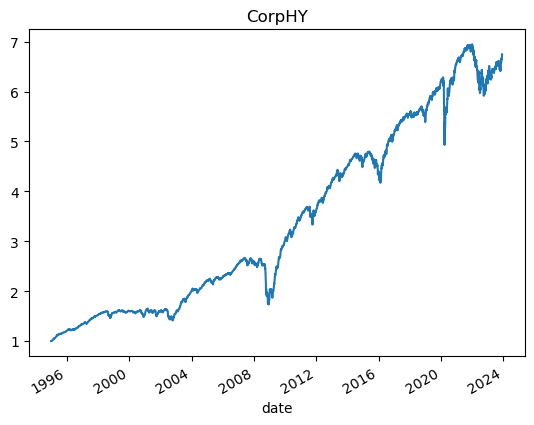

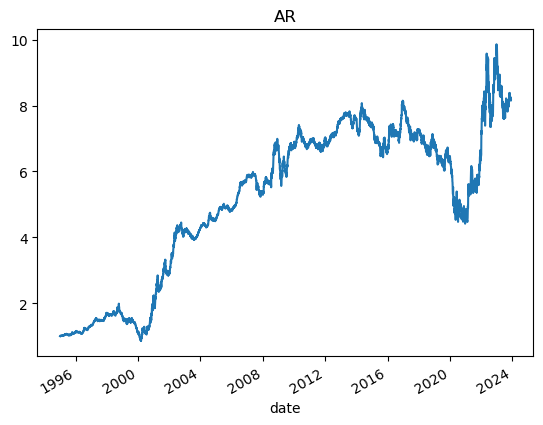

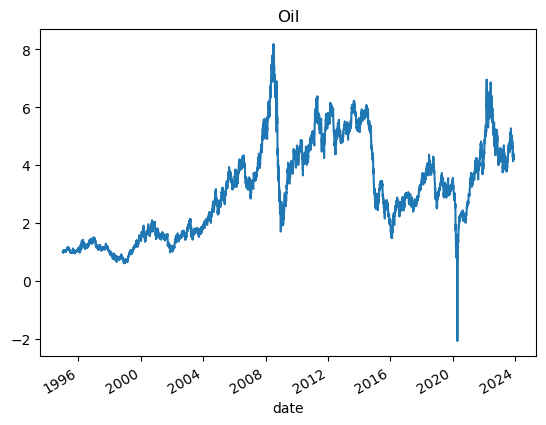

In [7]:
for i in data2.columns:
    if data2[i].dtypes == 'float64':
        fig = plt.figure()
        plt.title(i)
        ax = data2[i].plot()

We see that the column Oil has an outlier. To replace the cell where there is the outlier value we replace this value by the average between the value before and the value after this cell.

In [8]:
for i in range(len(data2)):
    if data2['Oil'][i] < -1:
        data2['Oil'][i] = (data2['Oil'][i - 1] + data2['Oil'][i + 1]) / 2

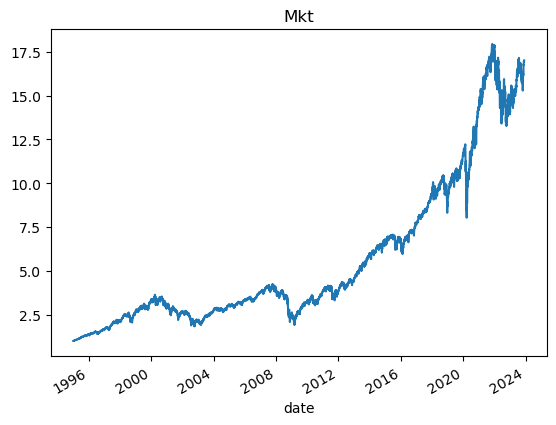

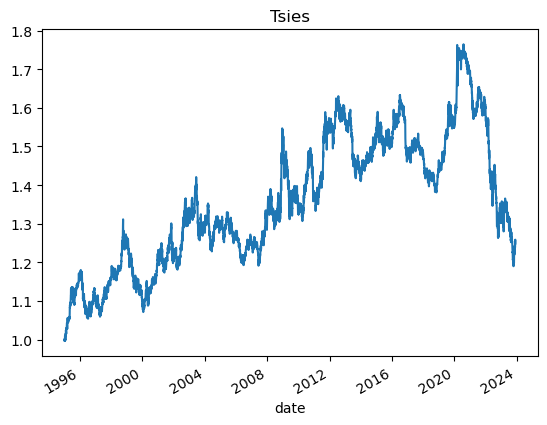

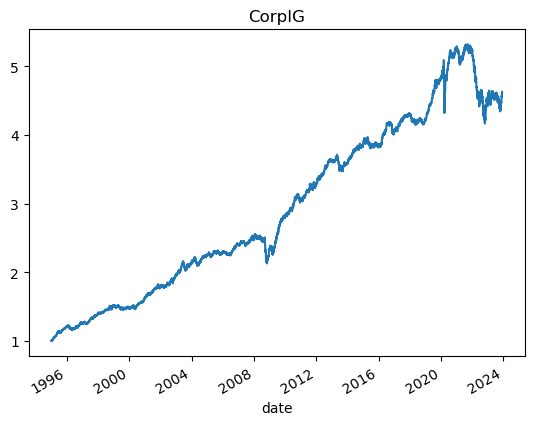

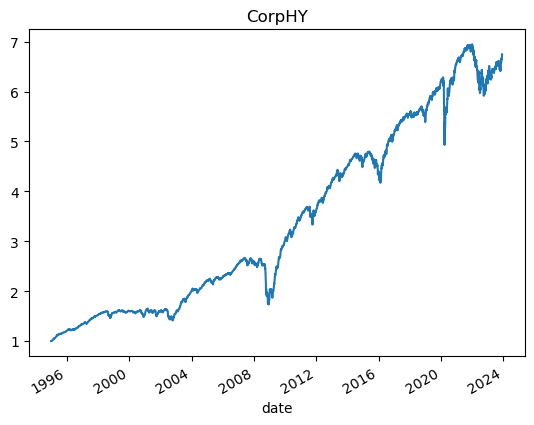

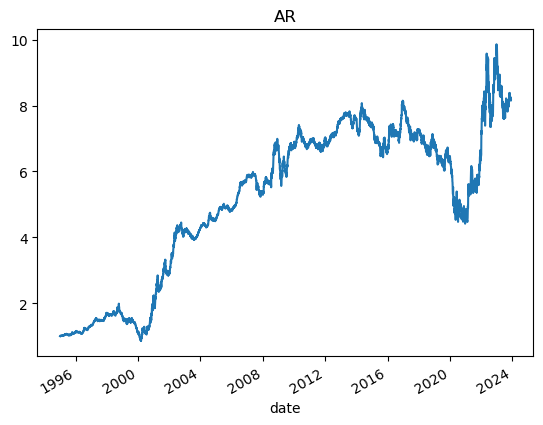

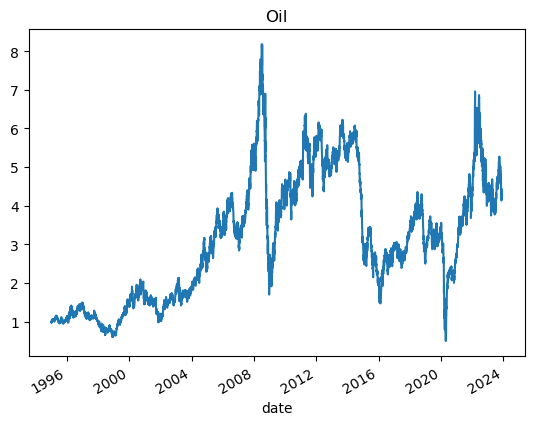

In [9]:
for i in data2.columns:
    if data2[i].dtypes == 'float64':
        fig = plt.figure()
        plt.title(i)
        ax = data2[i].plot()

We now calculate returns

In [10]:
df=data2.pct_change()
df

,Mkt,Tsies,CorpIG,CorpHY,AR,Oil
date,,,,,,
1994-12-30,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-03,-0.00240,-0.002733,-0.002136,0.000572,0.00881,-0.018008
1995-01-04,0.00350,0.004110,0.003686,0.001627,0.00615,0.006304
1995-01-05,-0.00030,-0.004099,-0.002310,0.002019,-0.00029,0.011390
1995-01-06,0.00200,0.000683,0.001707,-0.002015,-0.00127,-0.003941
...,...,...,...,...,...,...
2023-11-24,0.00131,-0.003997,-0.003353,-0.000020,-0.00035,-0.025651
2023-11-27,-0.00209,0.006419,0.007066,0.002134,-0.00126,-0.004945
2023-11-28,0.00081,0.004022,0.002797,0.002754,-0.00049,0.021891


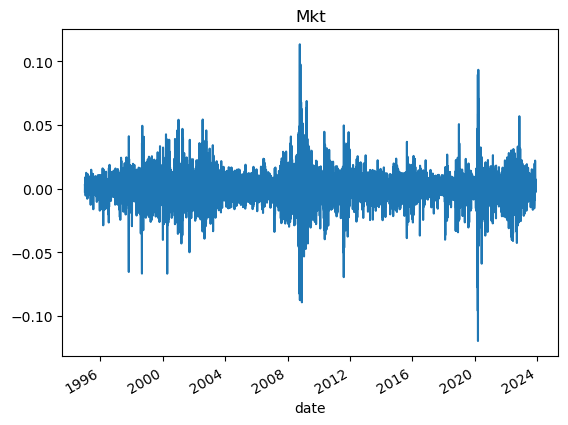

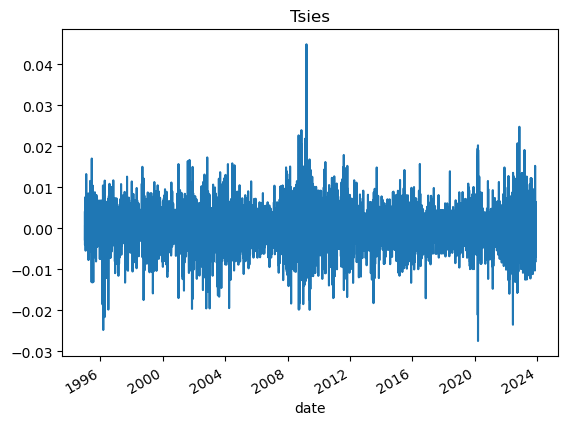

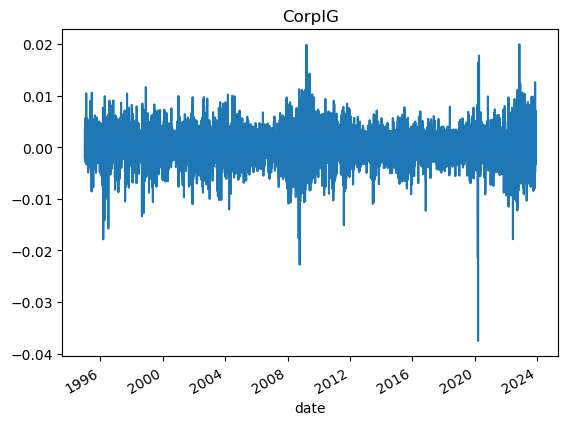

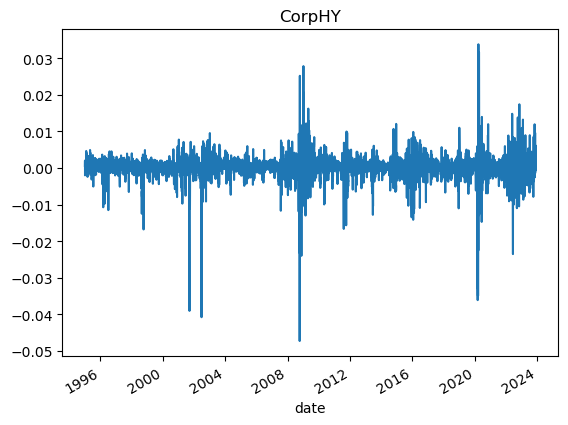

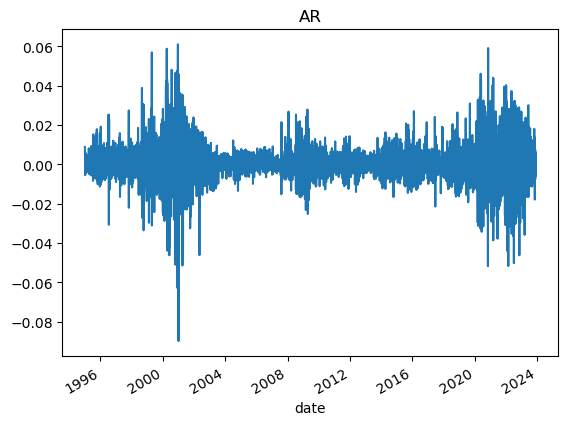

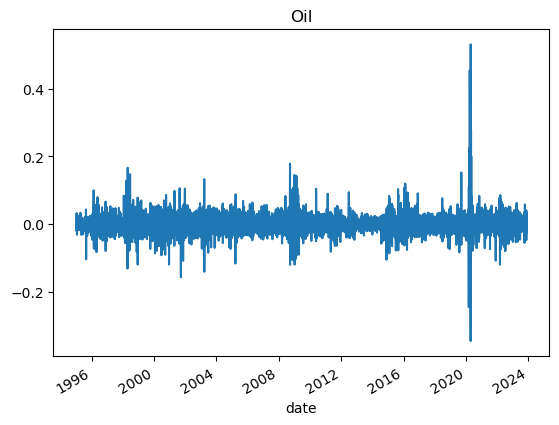

In [11]:
for i in df.columns:
    if df[i].dtypes == 'float64':
        fig = plt.figure()
        plt.title(i)
        ax = df[i].plot()

In [12]:
weight_default=np.array([0.5,0.2,0.05,0.05,0.15,0.05])
df_weekly=df[-5:]

In [13]:
portfolio=np.dot(df_weekly.values,weight_default)

In [14]:
(np.ones(5)+portfolio).prod()-1

0.0028575188604331725

In [15]:
(df_weekly*weight_default)

,Mkt,Tsies,CorpIG,CorpHY,AR,Oil
date,,,,,,
2023-11-24,0.000655,-0.000799,-0.000168,-9.881488e-07,-0.000053,-0.001283
2023-11-27,-0.001045,0.001284,0.000353,1.067222e-04,-0.000189,-0.000247
2023-11-28,0.000405,0.000804,0.000140,1.377202e-04,-0.000074,0.001095
2023-11-29,0.000155,0.001130,0.000338,3.045123e-04,-0.000126,0.000966
2023-11-30,0.001855,-0.001606,-0.000148,-2.997368e-05,0.000126,-0.001225


# construction of portfolio:

In [16]:
df_portfolio_weight=pd.DataFrame({'Weights': ['Default weight', 'Augmented weight'],
                          'Mkt':[0.5, 0.4],
                          'Tsies':[0.2, 0.35],
                          'CorpIG':[0.05, 0],
                          'CorpHY':[0.05, 0],
                          'AR':[0.15, 0.25],
                          'Oil':[0.05, 0]})
df_portfolio_weight=df_portfolio_weight.set_index(['Weights'])
df_portfolio_weight

,Mkt,Tsies,CorpIG,CorpHY,AR,Oil
Weights,,,,,,
Default weight,0.5,0.20,0.05,0.05,0.15,0.05
Augmented weight,0.4,0.35,0.00,0.00,0.25,0.00


In [17]:
df_portfolio_value_garch=pd.DataFrame()
df_portfolio_value_garch.index=data2.index
data3=data2.copy()
data4=data2.copy()
for c in df_portfolio_weight.columns:
    data3[c]=data3[c]*df_portfolio_weight[c]['Default weight']
    data4[c]=data4[c]*df_portfolio_weight[c]['Augmented weight']
    
L_1=list(data3.sum(axis=1))
L_2=list(data4.sum(axis=1))
df_portfolio_value_garch['Default Portfolio Value']=L_1
df_portfolio_value_garch['Augmented Portfolio Value']=L_2
df_portfolio_value_garch

,Default Portfolio Value,Augmented Portfolio Value
date,,
1994-12-30,1.000000,1.000000
1995-01-03,0.998596,1.000286
1995-01-04,1.002667,1.004668
1995-01-05,1.002200,1.003038
1995-01-06,1.002931,1.003755
...,...,...
2023-11-24,10.725290,9.259952
2023-11-27,10.708894,9.245984
2023-11-28,10.722300,9.252222


In [18]:
Returns_Default_Portfolio = df_portfolio_value_garch["Default Portfolio Value"].pct_change(1)
df_returns_default = pd.DataFrame({'Returns_Default_Portfolio': Returns_Default_Portfolio})
df_returns_default

,Returns_Default_Portfolio
date,
1994-12-30,NaN
1995-01-03,-0.001404
1995-01-04,0.004077
1995-01-05,-0.000466
1995-01-06,0.000729
...,...
2023-11-24,0.000313
2023-11-27,-0.001529
2023-11-28,0.001252


In [19]:
Returns_Augmented_Portfolio = df_portfolio_value_garch["Augmented Portfolio Value"].pct_change(1)
df_returns_augmented = pd.DataFrame({'Returns_Augmented_Portfolio': Returns_Augmented_Portfolio})
df_returns_augmented

,Returns_Augmented_Portfolio
date,
1994-12-30,NaN
1995-01-03,0.000286
1995-01-04,0.004381
1995-01-05,-0.001623
1995-01-06,0.000715
...,...
2023-11-24,0.000694
2023-11-27,-0.001509
2023-11-28,0.000675


In [20]:
df_returns_garch = pd.merge(df_returns_default, df_returns_augmented, left_index=True, right_index=True, how='outer')
df_returns_garch

,Returns_Default_Portfolio,Returns_Augmented_Portfolio
date,,
1994-12-30,NaN,NaN
1995-01-03,-0.001404,0.000286
1995-01-04,0.004077,0.004381
1995-01-05,-0.000466,-0.001623
1995-01-06,0.000729,0.000715
...,...,...
2023-11-24,0.000313,0.000694
2023-11-27,-0.001529,-0.001509
2023-11-28,0.001252,0.000675


In [21]:
df_garch=pd.merge(df_portfolio_value_garch,df_returns_garch, left_index=True, right_index=True, how='outer')
df_garch

,Default Portfolio Value,Augmented Portfolio Value,Returns_Default_Portfolio,Returns_Augmented_Portfolio
date,,,,
1994-12-30,1.000000,1.000000,NaN,NaN
1995-01-03,0.998596,1.000286,-0.001404,0.000286
1995-01-04,1.002667,1.004668,0.004077,0.004381
1995-01-05,1.002200,1.003038,-0.000466,-0.001623
1995-01-06,1.002931,1.003755,0.000729,0.000715
...,...,...,...,...
2023-11-24,10.725290,9.259952,0.000313,0.000694
2023-11-27,10.708894,9.245984,-0.001529,-0.001509
2023-11-28,10.722300,9.252222,0.001252,0.000675


# Equally Weighted

In [22]:
df_portfolio_value=pd.DataFrame()
df_portfolio_value['Default Portfolio Value']=data2@df_portfolio_weight.loc['Default weight'].T
df_portfolio_value['Augmented Portfolio Value']=data2@df_portfolio_weight.loc['Augmented weight'].T
df_portfolio_value

,Default Portfolio Value,Augmented Portfolio Value
date,,
1994-12-30,1.000000,1.000000
1995-01-03,0.998596,1.000286
1995-01-04,1.002667,1.004668
1995-01-05,1.002200,1.003038
1995-01-06,1.002931,1.003755
...,...,...
2023-11-24,10.725290,9.259952
2023-11-27,10.708894,9.245984
2023-11-28,10.722300,9.252222


In [23]:
df_portfolio_value['Returns_Default_Portfolio']=df@df_portfolio_weight.loc['Default weight'].T
df_portfolio_value['Returns_Augmented_Portfolio']=df@df_portfolio_weight.loc['Augmented weight'].T
df_portfolio_value

,Default Portfolio Value,Augmented Portfolio Value,Returns_Default_Portfolio,Returns_Augmented_Portfolio
date,,,,
1994-12-30,1.000000,1.000000,NaN,NaN
1995-01-03,0.998596,1.000286,-0.001404,0.000286
1995-01-04,1.002667,1.004668,0.004075,0.004376
1995-01-05,1.002200,1.003038,-0.000458,-0.001627
1995-01-06,1.002931,1.003755,0.000734,0.000722
...,...,...,...,...
2023-11-24,10.725290,9.259952,-0.001648,-0.000962
2023-11-27,10.708894,9.245984,0.000263,0.001096
2023-11-28,10.722300,9.252222,0.002508,0.001609


In [24]:
minD = np.percentile(df_portfolio_value['Returns_Default_Portfolio'].iloc[1:], 2)
maxD=np.percentile(df_portfolio_value['Returns_Default_Portfolio'].iloc[1:], 98)
minA = np.percentile(df_portfolio_value['Returns_Augmented_Portfolio'].iloc[1:], 2)
maxA=np.percentile(df_portfolio_value['Returns_Augmented_Portfolio'].iloc[1:], 98)
print(minD,maxD,minA,maxA)

-0.012820052148391986 0.012429482741586029 -0.009690930168550766 0.009561428979179772


In [25]:
max(df_portfolio_value['Returns_Augmented_Portfolio'].iloc[1:])

0.042034157443182264

In [26]:
#Replace values that are > or < =-10% 
count1=0
count2=0
for i in range(len(df_portfolio_value)):
    if df_portfolio_value['Returns_Default_Portfolio'].iloc[i] <= minD:
        df_portfolio_value['Returns_Default_Portfolio'].iloc[i] = minD
        count1 += 1
    elif df_portfolio_value['Returns_Default_Portfolio'].iloc[i] >= maxD:
        df_portfolio_value['Returns_Default_Portfolio'].iloc[i] = maxD
        count1 += 1

print(count1)

292


In [27]:
for i in range(len(df_portfolio_value)):
    if df_portfolio_value['Returns_Augmented_Portfolio'].iloc[i] <= minA:
        df_portfolio_value['Returns_Augmented_Portfolio'].iloc[i] = minA
        count2 += 1
    elif df_portfolio_value['Returns_Augmented_Portfolio'].iloc[i] >= maxA:
        df_portfolio_value['Returns_Augmented_Portfolio'].iloc[i] = maxA
        count2 += 1
print(count2)

292


In [28]:
df_portfolio_value

,Default Portfolio Value,Augmented Portfolio Value,Returns_Default_Portfolio,Returns_Augmented_Portfolio
date,,,,
1994-12-30,1.000000,1.000000,NaN,NaN
1995-01-03,0.998596,1.000286,-0.001404,0.000286
1995-01-04,1.002667,1.004668,0.004075,0.004376
1995-01-05,1.002200,1.003038,-0.000458,-0.001627
1995-01-06,1.002931,1.003755,0.000734,0.000722
...,...,...,...,...
2023-11-24,10.725290,9.259952,-0.001648,-0.000962
2023-11-27,10.708894,9.245984,0.000263,0.001096
2023-11-28,10.722300,9.252222,0.002508,0.001609


In [29]:
#For an analysis from 2015-01-02 until now
date='2015-01-02'
start=data2.index.get_loc(date)
start

5037

In [30]:
sigma_ew=pd.DataFrame()
sigma_ew['EW Default']=df_portfolio_value['Returns_Default_Portfolio'].iloc[start:].rolling(window=260).std()*np.sqrt(260)
sigma_ew['EW Augmented']=df_portfolio_value['Returns_Augmented_Portfolio'].iloc[start:].rolling(window=260).std()*np.sqrt(260)
sigma_ew

,EW Default,EW Augmented
date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2023-11-24,0.078361,0.062309
2023-11-27,0.078280,0.062308
2023-11-28,0.078075,0.062238


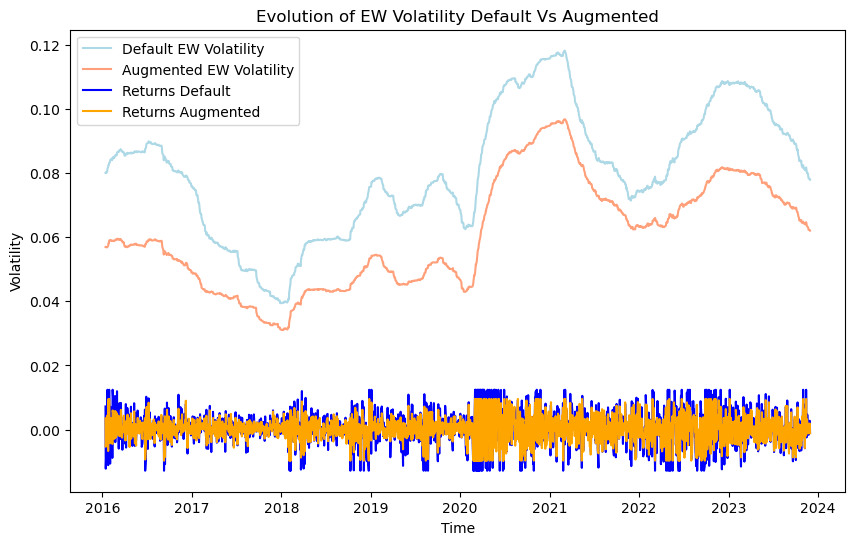

In [31]:
import matplotlib.pyplot as plt

# Tracer les deux variables en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(sigma_ew.index[260:], sigma_ew.iloc[260:,0], label='Default EW Volatility',color='lightblue')
plt.plot(sigma_ew.index[260:], sigma_ew.iloc[260:,1], label='Augmented EW Volatility',color='lightsalmon')
plt.plot(sigma_ew.index[260:], df_portfolio_value['Returns_Default_Portfolio'].iloc[start+260:], label='Returns Default',color='blue')
plt.plot(sigma_ew.index[260:], df_portfolio_value['Returns_Augmented_Portfolio'].iloc[start+260:], label='Returns Augmented',color='orange')

# Ajouter des titres et une légende
plt.title('Evolution of EW Volatility Default Vs Augmented')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()

# Afficher le graphique
plt.show()

# Assumptions GARCH

#### Serial returns **2 are correlated

In [32]:
df_portfolio_returns=pd.DataFrame()
df_portfolio_returns['Default_Portfolio_returns']=df_portfolio_value['Default Portfolio Value'].pct_change()
df_portfolio_returns['Default_Portfolio_returns_squared']=df_portfolio_returns['Default_Portfolio_returns']**2
df_portfolio_returns=df_portfolio_returns.iloc[1:,]

In [33]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
# Perform Ljung-Box test for autocorrelation
# Assuming df_portfolio_returns is your DataFrame
result = acorr_ljungbox(df_portfolio_returns['Default_Portfolio_returns_squared'], lags=5, return_df=True)

# Display the results
result

,lb_stat,lb_pvalue
1,1158.336679,6.918862e-254
2,3027.292240,0.000000e+00
3,3852.151327,0.000000e+00
4,4824.348322,0.000000e+00
5,5590.153401,0.000000e+00


In [34]:
from statsmodels.tsa.stattools import adfuller
ad_fuller_result=adfuller(df_portfolio_returns['Default_Portfolio_returns_squared'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p_value: {ad_fuller_result[1]}')

ADF Statistic: -10.532799072751374
p_value: 9.060132476193057e-19


Conclusion: Serial squared returns are correlated ==> good

### Heteroskedasticity 

In [35]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

def het_tests(series: pd.Series, test: str, choiceport: str) -> float:

    seriesb = series.copy()
    seriesb['Numeric_Index'] = pd.to_numeric(seriesb.index)

    olsr = sm.OLS(seriesb[choiceport + " Portfolio Value"], sm.add_constant(seriesb['Numeric_Index'])).fit()

    if test == 'White':
        _, p_value, _, _ = sms.het_white(olsr.resid, olsr.model.exog)
    elif test == 'Goldfeld-Quandt':
        _, p_value, _ = sms.het_goldfeldquandt(olsr.resid, olsr.model.exog, alternative='two-sided')
    else:
        _, p_value, _, _ = sms.het_breuschpagan(olsr.resid, olsr.model.exog)
    print(p_value)
    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.scatter(series.index, olsr.resid, label='Residuals')
    plt.title('Residuals of OLS Model')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

    return p_value

0.0


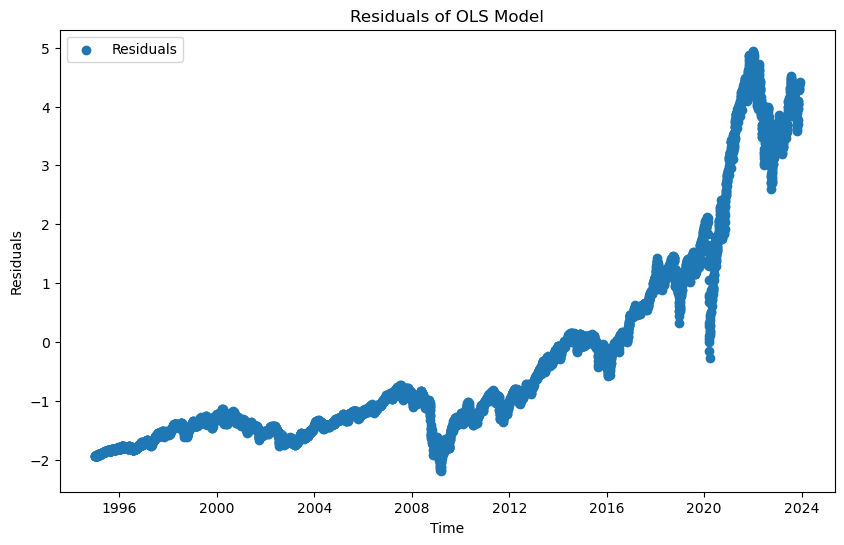

In [36]:
p_value_default=het_tests(df_portfolio_value_garch,'Goldfeld-Quandt','Default')

0.0


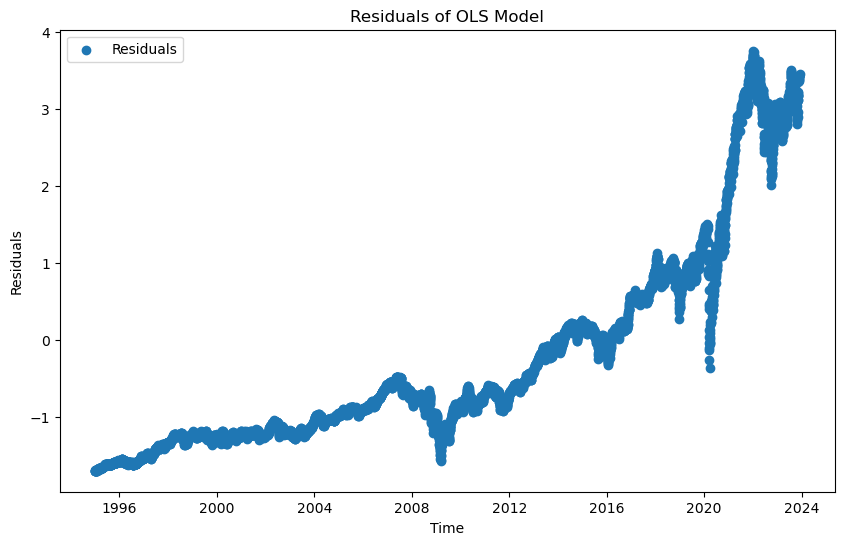

In [37]:
p_value_augmented=het_tests(df_portfolio_value_garch,'Goldfeld-Quandt','Augmented')

Conclusion: Variance changes over time ==> Good

# GARCH

In [38]:
# Define the start and end dates for the five-year period
start_date = '1995-01-01'
end_date = '2015-11-30'
# Five past years of daily data
df_returns_date = df_portfolio_value[start_date:end_date]
GARCH = pd.DataFrame(index=df_returns_date.index)

In [39]:
import scipy.optimize as opt

def compute_omega(factor,alpha,beta):
    persistence = alpha + beta
    return factor *(1-persistence)        
    
def compute_cond_var(data,initial_value,alpha,beta,omega=None):
    if omega is None:
        omega = compute_omega(initial_value,alpha,beta)
    cond_var = np.array([initial_value], dtype=np.float64)
    for time in range(1,len(data)):
        cond_var = np.append(cond_var,(omega +beta*cond_var[time-1]+alpha*data[time-1]**2))
    return cond_var
def fn(x, df, df1, r_var):
    sig_2 = compute_cond_var(df, r_var,x[0],x[1])[:-1]
    return (np.log(sig_2)+df1[1:]/sig_2).sum()*1/2

In [40]:
# GARCH COMPUTATION DEFAULT
returns_squared = df_returns_date['Returns_Default_Portfolio']**2
returns = df_returns_date['Returns_Default_Portfolio']

res = opt.minimize(fn, [0.08,0.82], bounds=[[0,1],[0,1]],
                    args=(returns, returns_squared, returns.std()**2))

cond_var_DM = compute_cond_var(returns, returns_squared.iloc[0], res.x[0], res.x[1])
GARCH['Returns_Default_Portfolio'] = np.sqrt(cond_var_DM)

# Print or use the result as needed
print('GARCH (1,1) Ann. LT Volatility of Default Mix Portfolio', GARCH['Returns_Default_Portfolio'].mean()*100, '%')

unscaled_alpha, unscaled_beta = res.x
scaled_alpha = unscaled_alpha
scaled_beta = unscaled_beta/10
unscaled_omega = (1 - (scaled_alpha + scaled_beta)) * GARCH['Returns_Default_Portfolio'].mean()
scaled_omega = unscaled_omega*10.000
results_DM = [unscaled_alpha, unscaled_beta]
print(f'scaled omega is: {scaled_omega:.4f}\n\
scaled alpha is:  {scaled_alpha:.4f}\n\
scaled beta is: {scaled_beta:.4f}')

/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1261789851.py:16: RuntimeWarning: invalid value encountered in log
  return (np.log(sig_2)+df1[1:]/sig_2).sum()*1/2


GARCH (1,1) Ann. LT Volatility of Default Mix Portfolio 0.42915683989015463 %
scaled omega is: 0.0360
scaled alpha is:  0.0686
scaled beta is: 0.0915


In [41]:
# GARCH COMPUTATION AUGMENTED
returns_squared = df_returns_date['Returns_Augmented_Portfolio']**2
returns = df_returns_date['Returns_Augmented_Portfolio']

res = opt.minimize(fn, [0.08,0.82], bounds=[[0,1],[0,1]],
                    args=(returns, returns_squared, returns.std()**2))

cond_var_AP = compute_cond_var(returns, returns_squared.iloc[0], res.x[0], res.x[1])
GARCH['Returns_Augmented_Portfolio'] = np.sqrt(cond_var_AP)
print('GARCH (1,1) LT Volatility of Augmented Portfolio', GARCH['Returns_Augmented_Portfolio'].mean()*100, '%')

unscaled_alpha, unscaled_beta = res.x
scaled_alpha = unscaled_alpha
scaled_beta = unscaled_beta/10
unscaled_omega = (1 - (scaled_alpha + scaled_beta)) * GARCH['Returns_Augmented_Portfolio'].mean()
scaled_omega = unscaled_omega*10.000
results_AP = [unscaled_alpha, unscaled_beta]

print(f'scaled omega is: {scaled_omega:.4f}\n\
scaled alpha is:  {scaled_alpha:.4f}\n\
scaled beta is: {scaled_beta:.4f}')

/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1261789851.py:16: RuntimeWarning: invalid value encountered in log
  return (np.log(sig_2)+df1[1:]/sig_2).sum()*1/2


GARCH (1,1) LT Volatility of Augmented Portfolio 0.3166154685020491 %
scaled omega is: 0.0266
scaled alpha is:  0.0683
scaled beta is: 0.0912


# GARCH Out of Sample Testing

In [42]:
# Define the start and end dates for the five-year period
start_date = '2015-12-01'
# Five past years of daily data
df_returns_oos= df_portfolio_value.loc[start_date:]
GARCH_OOS = pd.DataFrame(index=df_returns_oos.index)


In [43]:
#GARCH Out of Sample
cond_var_AP_oos = compute_cond_var(df_returns_oos['Returns_Augmented_Portfolio'], df_returns_oos['Returns_Augmented_Portfolio'].iloc[0]**2, results_AP[0], results_AP[1])
GARCH_OOS['Returns_Augmented_Portfolio'] = np.sqrt(cond_var_AP_oos)

cond_var_DM_oos = compute_cond_var(df_returns_oos['Returns_Default_Portfolio'], df_returns_oos['Returns_Default_Portfolio'].iloc[0]**2, results_DM[0], results_DM[1])
GARCH_OOS['Returns_Default_Portfolio'] = np.sqrt(cond_var_DM_oos)

In [44]:
GARCH_OOS["AP_Z"] = df_returns_oos['Returns_Augmented_Portfolio']/GARCH_OOS['Returns_Augmented_Portfolio']
GARCH_OOS["DP_Z"] = df_returns_oos['Returns_Default_Portfolio']/GARCH_OOS['Returns_Default_Portfolio']
GARCH_OOS

,Returns_Augmented_Portfolio,Returns_Default_Portfolio,AP_Z,DP_Z
date,,,,
2015-12-01,0.005848,0.006477,1.000000,1.000000
2015-12-02,0.005848,0.006477,-1.069820,-1.099236
2015-12-03,0.005877,0.006523,-1.524911,-1.278679
2015-12-04,0.006137,0.006663,1.281550,1.241719
2015-12-07,0.006265,0.006783,-0.242500,-0.905747
...,...,...,...,...
2023-11-24,0.004522,0.005340,-0.212798,-0.308593
2023-11-27,0.004403,0.005193,0.248867,0.050574
2023-11-28,0.004293,0.005037,0.374806,0.497919


In [45]:
GARCH_OOS_DP_Z_SCORE = GARCH_OOS["DP_Z"].mean()
GARCH_OOS_AP_Z_SCORE = GARCH_OOS["AP_Z"].mean()
print("GARCH Default Portfolio Z score = ",GARCH_OOS_DP_Z_SCORE," GARCH Augmented Portfolio Z score = ", GARCH_OOS_AP_Z_SCORE)

GARCH Default Portfolio Z score =  0.06849515965952063  GARCH Augmented Portfolio Z score =  0.05096119079865736


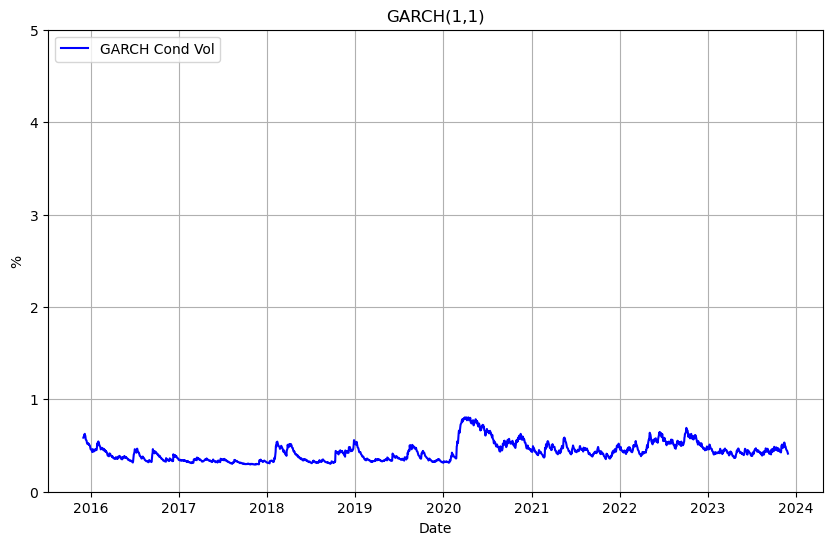

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the rolling volatility of 'AP Portfolio'
ax.plot(GARCH_OOS.index, GARCH_OOS['Returns_Augmented_Portfolio'] * 100, color='blue', label='GARCH Cond Vol')

# Set title and labels
ax.set_title('GARCH(1,1)')
ax.set_xlabel('Date')
ax.set_ylabel('%')

# Set y-axis range
ax.set_ylim(0, 5)

# Add gridlines
ax.grid(True)

# Add legend
ax.legend(loc='upper left')

# Show plot
plt.show()


# EWMA

In [47]:
df_garch

,Default Portfolio Value,Augmented Portfolio Value,Returns_Default_Portfolio,Returns_Augmented_Portfolio
date,,,,
1994-12-30,1.000000,1.000000,NaN,NaN
1995-01-03,0.998596,1.000286,-0.001404,0.000286
1995-01-04,1.002667,1.004668,0.004077,0.004381
1995-01-05,1.002200,1.003038,-0.000466,-0.001623
1995-01-06,1.002931,1.003755,0.000729,0.000715
...,...,...,...,...
2023-11-24,10.725290,9.259952,0.000313,0.000694
2023-11-27,10.708894,9.245984,-0.001529,-0.001509
2023-11-28,10.722300,9.252222,0.001252,0.000675


In [48]:
df_cal = df_portfolio_value.copy()

# Define the start and end dates for the five-year period
start_date = '1995-01-01'
end_date = '2023-11-30'
# Five past years of daily data
df_cal = df_portfolio_value[start_date:end_date]

df_cal['Default Portfolio Return square'] = df_cal['Returns_Default_Portfolio']**2
df_cal['Augmented Portfolio Return square'] = df_cal['Returns_Augmented_Portfolio']**2

df_cal['Default Condl Var'] = None
df_cal['Default Condl Var'].iloc[0] = df_cal['Default Portfolio Return square'].iloc[0]

df_cal['Augmented Condl Var'] = None
df_cal['Augmented Condl Var'].iloc[0] = df_cal['Augmented Portfolio Return square'].iloc[0]

lamb = 0.94

for i in range(1, len(df_cal)):
    df_cal['Default Condl Var'].iloc[i]=(1-lamb)*df_cal['Default Portfolio Return square'].iloc[i-1]+lamb*df_cal['Default Condl Var'].iloc[i-1]
    df_cal['Augmented Condl Var'].iloc[i]=(1-lamb)*df_cal['Augmented Portfolio Return square'].iloc[i-1]+lamb*df_cal['Augmented Condl Var'].iloc[i-1]
    
df_cal

/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1882460392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal['Default Portfolio Return square'] = df_cal['Returns_Default_Portfolio']**2
/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1882460392.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal['Augmented Portfolio Return square'] = df_cal['Returns_Augmented_Portfolio']**2
/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1882460392.py:12: Setti

,Default Portfolio Value,Augmented Portfolio Value,Returns_Default_Portfolio,Returns_Augmented_Portfolio,Default Portfolio Return square,Augmented Portfolio Return square,Default Condl Var,Augmented Condl Var
date,,,,,,,,
1995-01-03,0.998596,1.000286,-0.001404,0.000286,1.970090e-06,8.185479e-08,0.000002,0.0
1995-01-04,1.002667,1.004668,0.004075,0.004376,1.660784e-05,1.914871e-05,0.000002,0.0
1995-01-05,1.002200,1.003038,-0.000458,-0.001627,2.100840e-07,2.647441e-06,0.000003,0.000001
1995-01-06,1.002931,1.003755,0.000734,0.000722,5.383401e-07,5.208588e-07,0.000003,0.000001
1995-01-09,1.001742,1.002754,-0.001187,-0.000990,1.409725e-06,9.810633e-07,0.000003,0.000001
...,...,...,...,...,...,...,...,...
2023-11-24,10.725290,9.259952,-0.001648,-0.000962,2.715903e-06,9.260740e-07,0.000025,0.000017
2023-11-27,10.708894,9.245984,0.000263,0.001096,6.898195e-08,1.200560e-06,0.000024,0.000016
2023-11-28,10.722300,9.252222,0.002508,0.001609,6.289739e-06,2.589053e-06,0.000023,0.000015


In [49]:
# Define out of sample period
df_cal_out_of_sample = df_cal.loc['20150101':'20231130']
df_cal_out_of_sample

,Default Portfolio Value,Augmented Portfolio Value,Returns_Default_Portfolio,Returns_Augmented_Portfolio,Default Portfolio Return square,Augmented Portfolio Return square,Default Condl Var,Augmented Condl Var
date,,,,,,,,
2015-01-02,5.349946,5.080914,-0.000274,0.001002,7.497689e-08,1.003979e-06,0.000018,0.000007
2015-01-05,5.278386,5.027686,-0.010859,-0.005871,1.179138e-04,3.447102e-05,0.000017,0.000007
2015-01-06,5.242146,5.006936,-0.005723,-0.001509,3.274989e-05,2.275806e-06,0.000023,0.000008
2015-01-07,5.279812,5.031432,0.006487,0.004131,4.208433e-05,1.706875e-05,0.000024,0.000008
2015-01-08,5.335654,5.071492,0.007610,0.004455,5.791970e-05,1.984930e-05,0.000025,0.000009
...,...,...,...,...,...,...,...,...
2023-11-24,10.725290,9.259952,-0.001648,-0.000962,2.715903e-06,9.260740e-07,0.000025,0.000017
2023-11-27,10.708894,9.245984,0.000263,0.001096,6.898195e-08,1.200560e-06,0.000024,0.000016
2023-11-28,10.722300,9.252222,0.002508,0.001609,6.289739e-06,2.589053e-06,0.000023,0.000015


In [50]:
def calculate_square_root(x):
    return np.sqrt(x)

df_cal_out_of_sample['Default Vol'] = df_cal_out_of_sample['Default Condl Var'].apply(calculate_square_root)
df_cal_out_of_sample['Augmented Vol'] = df_cal_out_of_sample['Augmented Condl Var'].apply(calculate_square_root)
df_cal_out_of_sample

/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1515767784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_out_of_sample['Default Vol'] = df_cal_out_of_sample['Default Condl Var'].apply(calculate_square_root)
/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1515767784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_out_of_sample['Augmented Vol'] = df_cal_out_of_sample['Augmented Condl Var'].apply(calculate_square_root)


,Default Portfolio Value,Augmented Portfolio Value,Returns_Default_Portfolio,Returns_Augmented_Portfolio,Default Portfolio Return square,Augmented Portfolio Return square,Default Condl Var,Augmented Condl Var,Default Vol,Augmented Vol
date,,,,,,,,,,
2015-01-02,5.349946,5.080914,-0.000274,0.001002,7.497689e-08,1.003979e-06,0.000018,0.000007,0.004286,0.002686
2015-01-05,5.278386,5.027686,-0.010859,-0.005871,1.179138e-04,3.447102e-05,0.000017,0.000007,0.004156,0.002616
2015-01-06,5.242146,5.006936,-0.005723,-0.001509,3.274989e-05,2.275806e-06,0.000023,0.000008,0.004828,0.002915
2015-01-07,5.279812,5.031432,0.006487,0.004131,4.208433e-05,1.706875e-05,0.000024,0.000008,0.004886,0.002851
2015-01-08,5.335654,5.071492,0.007610,0.004455,5.791970e-05,1.984930e-05,0.000025,0.000009,0.004997,0.002943
...,...,...,...,...,...,...,...,...,...,...
2023-11-24,10.725290,9.259952,-0.001648,-0.000962,2.715903e-06,9.260740e-07,0.000025,0.000017,0.005044,0.004167
2023-11-27,10.708894,9.245984,0.000263,0.001096,6.898195e-08,1.200560e-06,0.000024,0.000016,0.004907,0.004047
2023-11-28,10.722300,9.252222,0.002508,0.001609,6.289739e-06,2.589053e-06,0.000023,0.000015,0.004758,0.003933


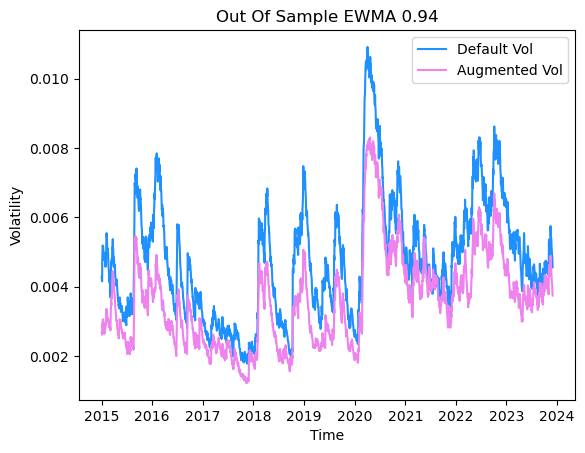

In [51]:
plt.plot(df_cal_out_of_sample['Default Vol'], label='Default Vol', c='dodgerblue')
plt.plot(df_cal_out_of_sample['Augmented Vol'], label='Augmented Vol', c='violet')
plt.title('Out Of Sample EWMA 0.94')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [52]:
CRAP = df_portfolio_value.copy()
CRAP

,Default Portfolio Value,Augmented Portfolio Value,Returns_Default_Portfolio,Returns_Augmented_Portfolio
date,,,,
1994-12-30,1.000000,1.000000,NaN,NaN
1995-01-03,0.998596,1.000286,-0.001404,0.000286
1995-01-04,1.002667,1.004668,0.004075,0.004376
1995-01-05,1.002200,1.003038,-0.000458,-0.001627
1995-01-06,1.002931,1.003755,0.000734,0.000722
...,...,...,...,...
2023-11-24,10.725290,9.259952,-0.001648,-0.000962
2023-11-27,10.708894,9.245984,0.000263,0.001096
2023-11-28,10.722300,9.252222,0.002508,0.001609


In [53]:
# Z-scores computation:
df_cal_out_of_sample['DP_Z']=df_cal_out_of_sample['Returns_Default_Portfolio']/df_cal_out_of_sample['Default Vol']
df_cal_out_of_sample['AP_Z']=df_cal_out_of_sample['Returns_Augmented_Portfolio']/df_cal_out_of_sample['Augmented Vol']
df_cal_out_of_sample

/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1357307072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_out_of_sample['DP_Z']=df_cal_out_of_sample['Returns_Default_Portfolio']/df_cal_out_of_sample['Default Vol']
/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1357307072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_out_of_sample['AP_Z']=df_cal_out_of_sample['Returns_Augmented_Portfolio']/df_cal_out_of_sample['Augmented Vol']


,Default Portfolio Value,Augmented Portfolio Value,Returns_Default_Portfolio,Returns_Augmented_Portfolio,Default Portfolio Return square,Augmented Portfolio Return square,Default Condl Var,Augmented Condl Var,Default Vol,Augmented Vol,DP_Z,AP_Z
date,,,,,,,,,,,,
2015-01-02,5.349946,5.080914,-0.000274,0.001002,7.497689e-08,1.003979e-06,0.000018,0.000007,0.004286,0.002686,-0.063890,0.373065
2015-01-05,5.278386,5.027686,-0.010859,-0.005871,1.179138e-04,3.447102e-05,0.000017,0.000007,0.004156,0.002616,-2.612969,-2.244733
2015-01-06,5.242146,5.006936,-0.005723,-0.001509,3.274989e-05,2.275806e-06,0.000023,0.000008,0.004828,0.002915,-1.185346,-0.517472
2015-01-07,5.279812,5.031432,0.006487,0.004131,4.208433e-05,1.706875e-05,0.000024,0.000008,0.004886,0.002851,1.327659,1.449359
2015-01-08,5.335654,5.071492,0.007610,0.004455,5.791970e-05,1.984930e-05,0.000025,0.000009,0.004997,0.002943,1.523082,1.513775
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24,10.725290,9.259952,-0.001648,-0.000962,2.715903e-06,9.260740e-07,0.000025,0.000017,0.005044,0.004167,-0.326699,-0.230946
2023-11-27,10.708894,9.245984,0.000263,0.001096,6.898195e-08,1.200560e-06,0.000024,0.000016,0.004907,0.004047,0.053521,0.270755
2023-11-28,10.722300,9.252222,0.002508,0.001609,6.289739e-06,2.589053e-06,0.000023,0.000015,0.004758,0.003933,0.527067,0.409146


In [54]:
EWMA_OOS=pd.DataFrame()
EWMA_OOS["Default Portfolio Value"]=df_cal_out_of_sample["Default Portfolio Value"]
EWMA_OOS["Augmented Portfolio Value"]=df_cal_out_of_sample["Augmented Portfolio Value"]
EWMA_OOS["DP_Z"]=df_cal_out_of_sample["DP_Z"]
EWMA_OOS["AP_Z"]=df_cal_out_of_sample["AP_Z"]
EWMA_OOS

,Default Portfolio Value,Augmented Portfolio Value,DP_Z,AP_Z
date,,,,
2015-01-02,5.349946,5.080914,-0.063890,0.373065
2015-01-05,5.278386,5.027686,-2.612969,-2.244733
2015-01-06,5.242146,5.006936,-1.185346,-0.517472
2015-01-07,5.279812,5.031432,1.327659,1.449359
2015-01-08,5.335654,5.071492,1.523082,1.513775
...,...,...,...,...
2023-11-24,10.725290,9.259952,-0.326699,-0.230946
2023-11-27,10.708894,9.245984,0.053521,0.270755
2023-11-28,10.722300,9.252222,0.527067,0.409146


In [55]:
#We compute Z-Scores means

EWMA_DP_Z_SCORE = EWMA_OOS['DP_Z'].mean()
EWMA_AP_Z_SCORE = EWMA_OOS['AP_Z'].mean()
print("EWMA Default Portfolio Z score = ",EWMA_DP_Z_SCORE," EWMA Augmented Portfolio Z score = ", EWMA_AP_Z_SCORE)

EWMA Default Portfolio Z score =  0.06474642777290739  EWMA Augmented Portfolio Z score =  0.05357110443374234


# Model comparison

In [56]:
df1_last_two = GARCH_OOS.iloc[:, -2:]
df2_last_two = EWMA_OOS.iloc[:, -2:]

GARCH_EWMA_Z_SCORE = pd.merge(df1_last_two, df2_last_two, left_index=True, right_index=True)
GARCH_EWMA_Z_SCORE.columns.values[0] = "AP_GARCH"
GARCH_EWMA_Z_SCORE.columns.values[1] = "DP_GARCH"
GARCH_EWMA_Z_SCORE.columns.values[2] = "DP_EWMA"
GARCH_EWMA_Z_SCORE.columns.values[3] = "AP_EWMA"

M = len(GARCH_EWMA_Z_SCORE)

GARCH_EWMA_Z_SCORE

,AP_GARCH,DP_GARCH,DP_EWMA,AP_EWMA
date,,,,
2015-12-01,1.000000,1.000000,1.446635,1.843915
2015-12-02,-1.069820,-1.099236,-1.540494,-1.844329
2015-12-03,-1.524911,-1.278679,-1.734693,-2.469877
2015-12-04,1.281550,1.241719,1.625497,1.896617
2015-12-07,-0.242500,-0.905747,-1.151606,-0.340772
...,...,...,...,...
2023-11-24,-0.212798,-0.308593,-0.326699,-0.230946
2023-11-27,0.248867,0.050574,0.053521,0.270755
2023-11-28,0.374806,0.497919,0.527067,0.409146


## Criterion 1 : average bias

In [57]:
df = GARCH_EWMA_Z_SCORE.copy()
# compute volatilities of the models's z-scores
DP_GARCH_vol = round(df["DP_GARCH"].std(), 2)
AP_GARCH_vol = round(df["AP_GARCH"].std(), 2)
DP_EWMA_vol = round(df["DP_EWMA"].std(), 2)
AP_EWMA_vol = round(df["AP_EWMA"].std(), 2)

# compute 95% confidence intervals
DP_GARCH_vol_ste_d = (1 - np.sqrt(2/M)) * DP_GARCH_vol
DP_GARCH_vol_ste_u = (1 + np.sqrt(2/M)) * DP_GARCH_vol
AP_GARCH_vol_ste_d = (1 - np.sqrt(2/M)) * AP_GARCH_vol
AP_GARCH_vol_ste_u = (1 + np.sqrt(2/M)) * AP_GARCH_vol
DP_EWMA_vol_ste_d = (1 - np.sqrt(2/M)) * DP_EWMA_vol
DP_EWMA_vol_ste_u = (1 + np.sqrt(2/M)) * DP_EWMA_vol
AP_EWMA_vol_ste_d = (1 - np.sqrt(2/M)) * AP_EWMA_vol
AP_EWMA_vol_ste_u = (1 + np.sqrt(2/M)) * AP_EWMA_vol

DP_GARCH_vol_conf = str(round(DP_GARCH_vol_ste_d, 2))+':'+str(round(DP_GARCH_vol_ste_u, 2))
AP_GARCH_vol_conf = str(round(AP_GARCH_vol_ste_d, 2))+':'+str(round(AP_GARCH_vol_ste_u, 2))
DP_EWMA_vol_conf = str(round(DP_EWMA_vol_ste_d, 2))+':'+str(round(DP_EWMA_vol_ste_u, 2))
AP_EWMA_vol_conf = str(round(AP_EWMA_vol_ste_d, 2))+':'+str(round(AP_EWMA_vol_ste_u, 2))

# create table
Criterion_one = pd.DataFrame({
    'z-scores': ['DP_GARCH', 'AP_GARCH', 'DP_EWMA', 'AP_EWMA'],
    'st dev': [DP_GARCH_vol, AP_GARCH_vol, DP_EWMA_vol, AP_EWMA_vol],
    '95% conf': [DP_GARCH_vol_conf, AP_GARCH_vol_conf, DP_EWMA_vol_conf, AP_EWMA_vol_conf],
})
Criterion_one = Criterion_one.set_index(['z-scores']).transpose()
Criterion_one

z-scores,DP_GARCH,AP_GARCH,DP_EWMA,AP_EWMA
st dev,0.91,0.84,1.03,1.04
95% conf,0.88:0.94,0.81:0.87,1.0:1.06,1.01:1.07


## Criterion 2 : bias over time

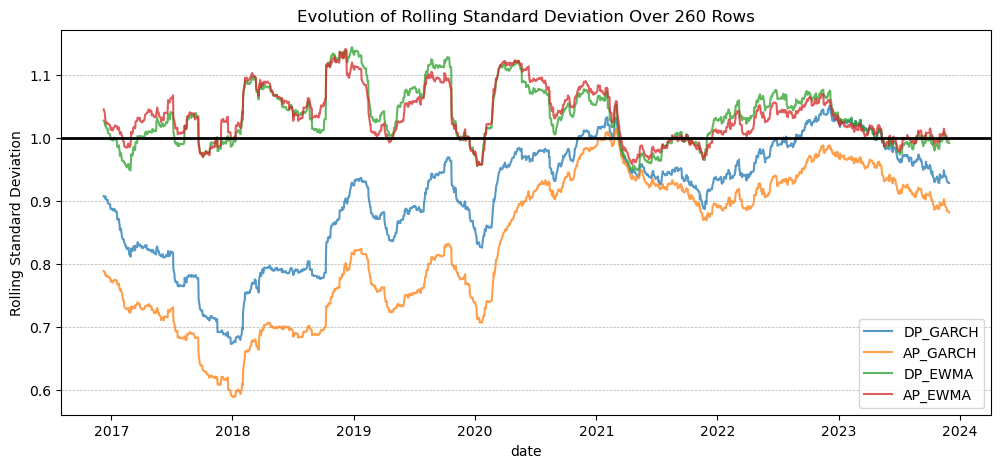

MRAD of DP_GARCH = 0.1
MRAD of AP_GARCH = 0.17
MRAD of DP_EWMA = 0.04
MRAD of AP_EWMA = 0.04


In [58]:
df_rolling = df
df_rolling['DP_GARCH'] = df['DP_GARCH'].rolling(window=260).std()
df_rolling['AP_GARCH'] = df['AP_GARCH'].rolling(window=260).std()
df_rolling['DP_EWMA'] = df['DP_EWMA'].rolling(window=260).std()
df_rolling['AP_EWMA'] = df['AP_EWMA'].rolling(window=260).std()

# plot the results
plt.figure(figsize=(12, 5))
plt.plot(df_rolling['DP_GARCH'], label='DP_GARCH', alpha=0.75)
plt.plot(df_rolling['AP_GARCH'], label='AP_GARCH', alpha=0.75)
plt.plot(df_rolling['DP_EWMA'], label='DP_EWMA', alpha=0.75)
plt.plot(df_rolling['AP_EWMA'], label='AP_EWMA', alpha=0.75)

plt.title('Evolution of Rolling Standard Deviation Over 260 Rows')
plt.xlabel('date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.axhline(y=1, color='black', linestyle='-', linewidth=2)
plt.show()

# compute mean rolling absolute deviations
df_rolling = df_rolling.dropna()
df_adj = df_rolling.copy()
df_adj.loc[:, 'DP_GARCH'] += -1
df_adj.loc[:, 'AP_GARCH'] += -1
df_adj.loc[:, 'DP_EWMA'] += -1
df_adj.loc[:, 'AP_EWMA'] += -1
M_adj = len(df_adj)

MRAD_DP_GARCH = round((1/M_adj) * df_adj['DP_GARCH'].abs().sum(), 2)
MRAD_AP_GARCH = round((1/M_adj) * df_adj['AP_GARCH'].abs().sum(), 2)
MRAD_DP_EWMA = round((1/M_adj) * df_adj['DP_EWMA'].abs().sum(), 2)
MRAD_AP_EWMA = round((1/M_adj) * df_adj['AP_EWMA'].abs().sum(), 2)

print(f'MRAD of DP_GARCH = {MRAD_DP_GARCH}')
print(f'MRAD of AP_GARCH = {MRAD_AP_GARCH}')
print(f'MRAD of DP_EWMA = {MRAD_DP_EWMA}')
print(f'MRAD of AP_EWMA = {MRAD_AP_EWMA}')


## Criterion 3 : distribution

In [59]:
# Compute excess kurtosis of z-scores for each model
DP_GARCH_kur = GARCH_OOS["DP_Z"].kurtosis()
AP_GARCH_kur = GARCH_OOS["AP_Z"].kurtosis()
DP_EWMA_kur = EWMA_OOS['DP_Z'].kurtosis()
AP_EWMA_kur = EWMA_OOS['AP_Z'].kurtosis()

# Compute robust skewness of z-scores for each model
DP_GARCH_skew = (df['DP_GARCH'].mean() - df['DP_GARCH'].median()) / df['DP_GARCH'].std()
AP_GARCH_skew = (df['AP_GARCH'].mean() - df['AP_GARCH'].median()) / df['AP_GARCH'].std()
DP_EWMA_skew = (df['DP_EWMA'].mean() - df['DP_EWMA'].median()) / df['DP_EWMA'].std()
AP_EWMA_skew = (df['AP_EWMA'].mean() - df['AP_EWMA'].median()) / df['AP_EWMA'].std()

# create table
Criterion_three = pd.DataFrame({
    'z-scores': ['DP_GARCH', 'AP_GARCH', 'DP_EWMA', 'AP_EWMA'],
    'excess kurtosis': [DP_GARCH_kur, AP_GARCH_kur, DP_EWMA_kur, AP_EWMA_kur],
    'robust skewness': [DP_GARCH_skew, AP_GARCH_skew, DP_EWMA_skew, AP_EWMA_skew],
})
Criterion_three = Criterion_three.set_index(['z-scores']).transpose()
Criterion_three

z-scores,DP_GARCH,AP_GARCH,DP_EWMA,AP_EWMA
excess kurtosis,0.348525,0.121469,0.952421,0.749952
robust skewness,-0.315341,-0.423154,0.103071,0.129682


## Criterion 4 : relative

In [60]:
# compute quasi-likelihood statistics
df_QL = np.log(GARCH_EWMA_Z_SCORE**2) - (GARCH_EWMA_Z_SCORE**2)
DP_GARCH_QL = df_QL['DP_GARCH'].sum()
AP_GARCH_QL = df_QL['AP_GARCH'].sum()
DP_EWMA_QL = df_QL['DP_EWMA'].sum()
AP_EWMA_QL = df_QL['AP_EWMA'].sum()

Criterion_four = pd.DataFrame({
    'z-scores': ['DP_GARCH', 'AP_GARCH', 'DP_EWMA', 'AP_EWMA'],
    'QL statistic': [DP_GARCH_QL, AP_GARCH_QL, DP_EWMA_QL, AP_EWMA_QL],
})
Criterion_four = Criterion_four.set_index(['z-scores']).transpose()
Criterion_four



z-scores,DP_GARCH,AP_GARCH,DP_EWMA,AP_EWMA
QL statistic,-4742.891866,-4824.733306,-4732.113886,-4696.189283


# Ex-ante Risk Evaluation

In [61]:
start_date_of_lookback_window = '2022-11-17'
close_date_of_lookback_window = '2023-11-30'

start_index = df_returns_garch.index.get_loc(start_date_of_lookback_window)
Portofolio_Value_over_260days = df_portfolio_value.iloc[start_index:]
Portofolio_Value_over_260days

,Default Portfolio Value,Augmented Portfolio Value,Returns_Default_Portfolio,Returns_Augmented_Portfolio
date,,,,
2022-11-17,9.680436,8.574802,-0.003603,0.000207
2022-11-18,9.715866,8.614777,0.001449,0.002155
2022-11-21,9.702298,8.625496,-0.000136,0.002145
2022-11-22,9.817856,8.723044,0.010107,0.009127
2022-11-23,9.839122,8.726420,0.000451,0.000142
...,...,...,...,...
2023-11-24,10.725290,9.259952,-0.001648,-0.000962
2023-11-27,10.708894,9.245984,0.000263,0.001096
2023-11-28,10.722300,9.252222,0.002508,0.001609


## HSIM

### VAR

In [62]:
# Rank the returns from lowest to highest
ranked_returns = Portofolio_Value_over_260days['Returns_Default_Portfolio'].sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_var_D = - ranked_returns.iloc[percentile_index]
fifth_percentile_var_D = "{:.2f}%".format(fifth_percentile_var_D * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_var_D = - ranked_returns.iloc[percentile_index]
first_percentile_var_D = "{:.2f}%".format(first_percentile_var_D * 100)

In [63]:
# Rank the returns from lowest to highest
ranked_returns = Portofolio_Value_over_260days['Returns_Augmented_Portfolio'].sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_var_A = - ranked_returns.iloc[percentile_index]
fifth_percentile_var_A = "{:.2f}%".format(fifth_percentile_var_A * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_var_A = - ranked_returns.iloc[percentile_index]
first_percentile_var_A = "{:.2f}%".format(first_percentile_var_A * 100)

### ES

In [64]:
# Rank the returns from lowest to highest
ranked_returns = Portofolio_Value_over_260days['Returns_Default_Portfolio'].sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_ES_D = - ranked_returns.iloc[:percentile_index].mean()
fifth_percentile_ES_D = "{:.2f}%".format(fifth_percentile_ES_D * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_ES_D = - ranked_returns.iloc[:percentile_index].mean()
first_percentile_ES_D = "{:.2f}%".format(first_percentile_ES_D * 100)

In [65]:
# Rank the returns from lowest to highest
ranked_returns = Portofolio_Value_over_260days['Returns_Augmented_Portfolio'].sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_ES_A = - ranked_returns.iloc[:percentile_index].mean()
fifth_percentile_ES_A = "{:.2f}%".format(fifth_percentile_ES_A * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_ES_A = - ranked_returns.iloc[:percentile_index].mean()
first_percentile_ES_A = "{:.2f}%".format(first_percentile_ES_A * 100)

In [66]:
var_es = pd.DataFrame({
    'VaR & ES': ['Default 95%', 'Augmented 95%', 'Default 99%', 'Augmented 99%'],
    'VAR': [fifth_percentile_var_D, fifth_percentile_var_A, first_percentile_var_D, first_percentile_var_D],
    'ES': [fifth_percentile_ES_D, fifth_percentile_ES_A, first_percentile_ES_D, first_percentile_ES_D],
})
var_es = var_es.set_index(['VaR & ES']).transpose()
var_es

VaR & ES,Default 95%,Augmented 95%,Default 99%,Augmented 99%
VAR,0.68%,0.59%,1.09%,1.09%
ES,0.91%,0.74%,1.20%,1.20%


#### Var Evaluation criteria

In [67]:
df_var_def=pd.concat([GARCH_OOS['Returns_Default_Portfolio'], df_cal_out_of_sample['Default Vol']], axis=1, keys=['DF_GARCH', 'DF_EWMA']).dropna()
df_var_def

,DF_GARCH,DF_EWMA
date,,
2015-12-01,0.006477,0.004477
2015-12-02,0.006477,0.004622
2015-12-03,0.006523,0.004808
2015-12-04,0.006663,0.005090
2015-12-07,0.006783,0.005335
...,...,...
2023-11-24,0.005340,0.005044
2023-11-27,0.005193,0.004907
2023-11-28,0.005037,0.004758


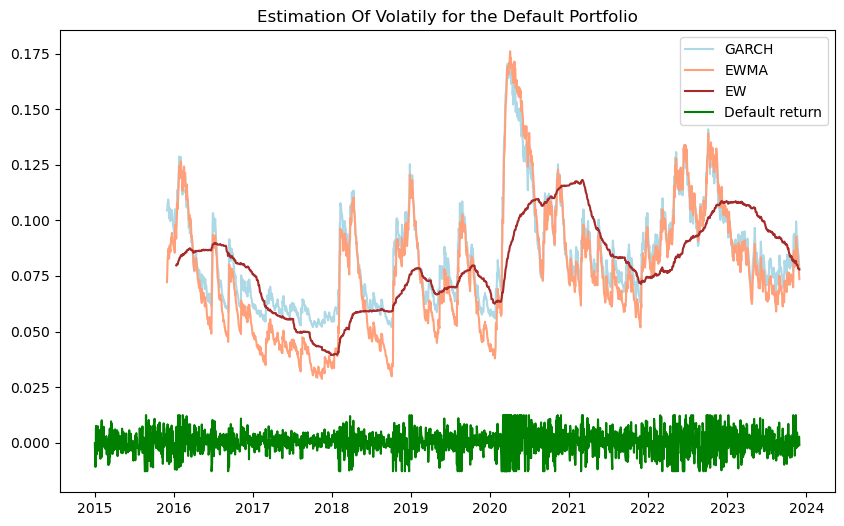

In [68]:
# Tracer les deux variables en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(df_var_def.index, df_var_def.iloc[:,0]*np.sqrt(260), label='GARCH',color='lightblue')
plt.plot(df_var_def.index, df_var_def.iloc[:,1]*np.sqrt(260), label='EWMA',color='lightsalmon')
plt.plot(sigma_ew.index, sigma_ew['EW Default'], label='EW',color='brown')
plt.plot(df_portfolio_value.index[start:], df_portfolio_value['Returns_Default_Portfolio'].iloc[start:], label='Default return',color='green')

# Ajouter des titres et une légende
plt.legend()
plt.title("Estimation Of Volatily for the Default Portfolio")

# Afficher le graphique
plt.show()

In [69]:
def var(dataframe, confidence_level):
    
    #Calculate the historical VaR:
    var=np.percentile(dataframe, confidence_level)
    
    return var

In [70]:
# Calculate the rolling standard deviation
rolling_std = pd.DataFrame(df_portfolio_value['Returns_Default_Portfolio'].iloc[start - 2*(260-1):].rolling(window=260).std())
# Apply the custom function with the specified confidence level
result = rolling_std.rolling(window=260).apply(var, args=(5,)).dropna()
result

,Returns_Default_Portfolio
date,
2015-01-02,0.003158
2015-01-05,0.003158
2015-01-06,0.003158
2015-01-07,0.003158
2015-01-08,0.003158
...,...
2023-11-24,0.005065
2023-11-27,0.005055
2023-11-28,0.005043


In [71]:
df_var_def['DF_HSIM']=result

In [72]:
from scipy.stats import norm
df_var_def['DF_GARCH']=df_var_def['DF_GARCH']*norm.ppf(1 - 0.05)
df_var_def['DF_EWMA']=df_var_def['DF_EWMA']*norm.ppf(1 - 0.05)
df_var_def

,DF_GARCH,DF_EWMA,DF_HSIM
date,,,
2015-12-01,0.010654,0.007365,0.003301
2015-12-02,0.010654,0.007602,0.003349
2015-12-03,0.010730,0.007909,0.003353
2015-12-04,0.010960,0.008372,0.003395
2015-12-07,0.011157,0.008775,0.003410
...,...,...,...
2023-11-24,0.008784,0.008297,0.005065
2023-11-27,0.008542,0.008072,0.005055
2023-11-28,0.008285,0.007827,0.005043


In [73]:
df_var_exc_def=df_var_def.copy()
df_var_exc_def

,DF_GARCH,DF_EWMA,DF_HSIM
date,,,
2015-12-01,0.010654,0.007365,0.003301
2015-12-02,0.010654,0.007602,0.003349
2015-12-03,0.010730,0.007909,0.003353
2015-12-04,0.010960,0.008372,0.003395
2015-12-07,0.011157,0.008775,0.003410
...,...,...,...
2023-11-24,0.008784,0.008297,0.005065
2023-11-27,0.008542,0.008072,0.005055
2023-11-28,0.008285,0.007827,0.005043


In [74]:
df_var_exc_def['Returns_Default_Portfolio']=df_portfolio_value['Returns_Default_Portfolio'].iloc[start:]
df_var_exc_def

,DF_GARCH,DF_EWMA,DF_HSIM,Returns_Default_Portfolio
date,,,,
2015-12-01,0.010654,0.007365,0.003301,0.006477
2015-12-02,0.010654,0.007602,0.003349,-0.007120
2015-12-03,0.010730,0.007909,0.003353,-0.008341
2015-12-04,0.010960,0.008372,0.003395,0.008274
2015-12-07,0.011157,0.008775,0.003410,-0.006144
...,...,...,...,...
2023-11-24,0.008784,0.008297,0.005065,-0.001648
2023-11-27,0.008542,0.008072,0.005055,0.000263
2023-11-28,0.008285,0.007827,0.005043,0.002508


In [75]:
for i in range(len(df_var_exc_def)-1):
    for j in range(df_var_exc_def.shape[1]-1):
        if -df_var_def.iloc[i,j]>=df_var_exc_def.iloc[i+1,-1]:
            df_var_exc_def.iloc[i,j]=1
        else:
            df_var_exc_def.iloc[i,j]=0
df_var_exc_def=df_var_exc_def.iloc[:-1,:]
df_var_exc_def

,DF_GARCH,DF_EWMA,DF_HSIM,Returns_Default_Portfolio
date,,,,
2015-12-01,0.0,0.0,1.0,0.006477
2015-12-02,0.0,1.0,1.0,-0.007120
2015-12-03,0.0,0.0,0.0,-0.008341
2015-12-04,0.0,0.0,1.0,0.008274
2015-12-07,0.0,0.0,1.0,-0.006144
...,...,...,...,...
2023-11-22,0.0,0.0,0.0,0.000806
2023-11-24,0.0,0.0,0.0,-0.001648
2023-11-27,0.0,0.0,0.0,0.000263


In [76]:
df_var_exc_def['expected'] = [i * 0.05 for i in range(len(df_var_exc_def))]
df_var_exc_def

/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1063168328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var_exc_def['expected'] = [i * 0.05 for i in range(len(df_var_exc_def))]


,DF_GARCH,DF_EWMA,DF_HSIM,Returns_Default_Portfolio,expected
date,,,,,
2015-12-01,0.0,0.0,1.0,0.006477,0.00
2015-12-02,0.0,1.0,1.0,-0.007120,0.05
2015-12-03,0.0,0.0,0.0,-0.008341,0.10
2015-12-04,0.0,0.0,1.0,0.008274,0.15
2015-12-07,0.0,0.0,1.0,-0.006144,0.20
...,...,...,...,...,...
2023-11-22,0.0,0.0,0.0,0.000806,100.40
2023-11-24,0.0,0.0,0.0,-0.001648,100.45
2023-11-27,0.0,0.0,0.0,0.000263,100.50


/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1733916220.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var_exc_def['cumulative_DF_GARCH'] = df_var_exc_def['DF_GARCH'].cumsum()
/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1733916220.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_var_exc_def['cumulative_DF_EWMA'] = df_var_exc_def['DF_EWMA'].cumsum()
/var/folders/gw/h3bw6tzs4nb5dx1ml0qj1mzr0000gn/T/ipykernel_9482/1733916220.py:9: SettingWithCopyWarning: 
A 

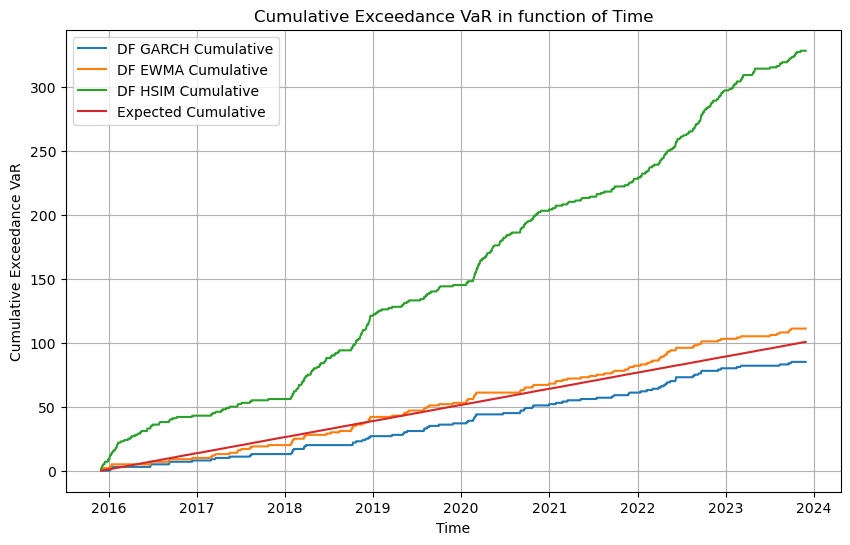

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a time index
# Replace 'column1', 'column2', and 'column3' with your actual column names

df_var_exc_def['cumulative_DF_GARCH'] = df_var_exc_def['DF_GARCH'].cumsum()
df_var_exc_def['cumulative_DF_EWMA'] = df_var_exc_def['DF_EWMA'].cumsum()
df_var_exc_def['cumulative_DF_HSIM'] = df_var_exc_def['DF_HSIM'].cumsum()


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_var_exc_def['cumulative_DF_GARCH'], label='DF GARCH Cumulative')
plt.plot(df_var_exc_def['cumulative_DF_EWMA'], label='DF EWMA Cumulative')
plt.plot(df_var_exc_def['cumulative_DF_HSIM'], label='DF HSIM Cumulative')
plt.plot(df_var_exc_def['expected'], label='Expected Cumulative')


# Customize the plot
plt.xlabel('Time')
plt.ylabel('Cumulative Exceedance VaR')
plt.title('Cumulative Exceedance VaR in function of Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [78]:
df_var_exc_def['cumulative_DF_HSIM']

date
2015-12-01      1.0
2015-12-02      2.0
2015-12-03      2.0
2015-12-04      3.0
2015-12-07      4.0
              ...  
2023-11-22    328.0
2023-11-24    328.0
2023-11-27    328.0
2023-11-28    328.0
2023-11-29    328.0
Name: cumulative_DF_HSIM, Length: 2013, dtype: float64

In [79]:
df_portfolio_value

,Default Portfolio Value,Augmented Portfolio Value,Returns_Default_Portfolio,Returns_Augmented_Portfolio
date,,,,
1994-12-30,1.000000,1.000000,NaN,NaN
1995-01-03,0.998596,1.000286,-0.001404,0.000286
1995-01-04,1.002667,1.004668,0.004075,0.004376
1995-01-05,1.002200,1.003038,-0.000458,-0.001627
1995-01-06,1.002931,1.003755,0.000734,0.000722
...,...,...,...,...
2023-11-24,10.725290,9.259952,-0.001648,-0.000962
2023-11-27,10.708894,9.245984,0.000263,0.001096
2023-11-28,10.722300,9.252222,0.002508,0.001609


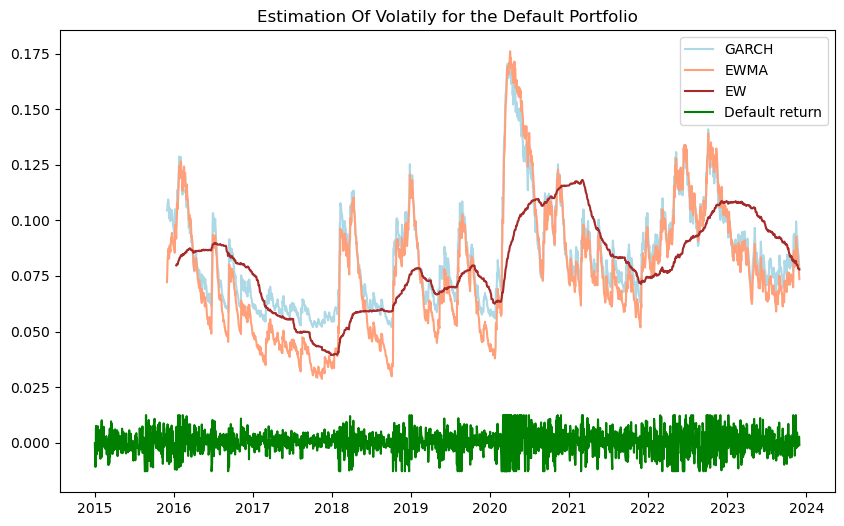

In [81]:
df_var_def=pd.concat([GARCH_OOS['Returns_Default_Portfolio'], df_cal_out_of_sample['Default Vol']], axis=1, keys=['DF_GARCH', 'DF_EWMA']).dropna()

# Tracer les deux variables en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(df_var_def.index, df_var_def.iloc[:,0]*np.sqrt(260), label='GARCH',color='lightblue')
plt.plot(df_var_def.index, df_var_def.iloc[:,1]*np.sqrt(260), label='EWMA',color='lightsalmon')
plt.plot(sigma_ew.index, sigma_ew['EW Default'], label='EW',color='brown')
plt.plot(df_portfolio_value.index[start:], df_portfolio_value['Returns_Default_Portfolio'].iloc[start:], label='Default return',color='green')

# Ajouter des titres et une légende
plt.legend()
plt.title("Estimation Of Volatily for the Default Portfolio")

# Afficher le graphique
plt.show()

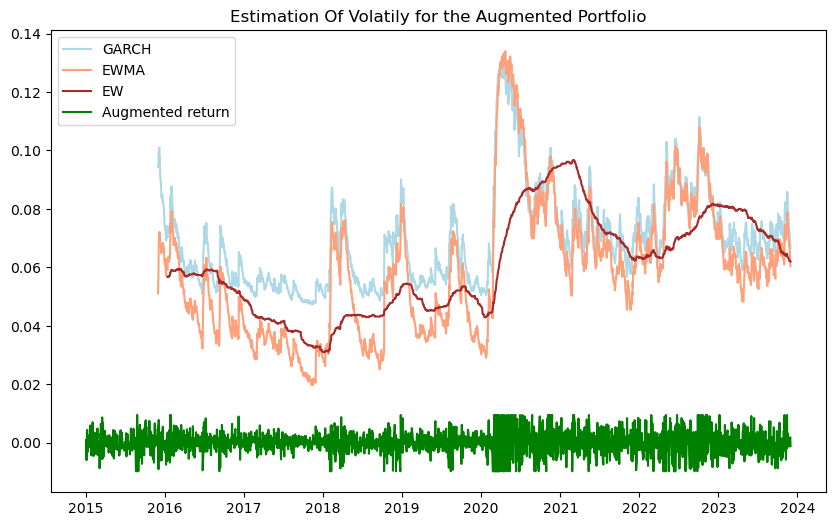

In [82]:
df_var_aug=pd.concat([GARCH_OOS['Returns_Augmented_Portfolio'], df_cal_out_of_sample['Augmented Vol']], axis=1, keys=['AG_GARCH', 'AG_EWMA']).dropna()

# Tracer les deux variables en fonction du temps
plt.figure(figsize=(10, 6))
plt.plot(df_var_aug.index, df_var_aug.iloc[:,0]*np.sqrt(260), label='GARCH',color='lightblue')
plt.plot(df_var_aug.index, df_var_aug.iloc[:,1]*np.sqrt(260), label='EWMA',color='lightsalmon')
plt.plot(sigma_ew.index, sigma_ew['EW Augmented'], label='EW',color='brown')
plt.plot(df_portfolio_value.index[start:], df_portfolio_value['Returns_Augmented_Portfolio'].iloc[start:], label='Augmented return',color='green')

# Ajouter des titres et une légende
plt.legend()
plt.title("Estimation Of Volatily for the Augmented Portfolio")

# Afficher le graphique
plt.show()

In [83]:
# Calculate the rolling standard deviation
rolling_std = pd.DataFrame(df_portfolio_value['Returns_Augmented_Portfolio'].iloc[start - 2*(260-1):].rolling(window=260).std())
# Apply the custom function with the specified confidence level
result = rolling_std.rolling(window=260).apply(var, args=(5,)).dropna()
df_var_aug['AG_HSIM']=result
from scipy.stats import norm
df_var_aug['AG_GARCH']=df_var_aug['AG_GARCH']*norm.ppf(1 - 0.05)
df_var_aug['AG_EWMA']=df_var_aug['AG_EWMA']*norm.ppf(1 - 0.05)
df_var_aug

,AG_GARCH,AG_EWMA,AG_HSIM
date,,,
2015-12-01,0.009619,0.005217,0.002356
2015-12-02,0.009619,0.005580,0.002356
2015-12-03,0.009667,0.005968,0.002356
2015-12-04,0.010094,0.006820,0.002356
2015-12-07,0.010304,0.007333,0.002356
...,...,...,...
2023-11-24,0.007438,0.006854,0.003996
2023-11-27,0.007242,0.006656,0.003991
2023-11-28,0.007061,0.006469,0.003990


In [84]:
df_var_exc_aug=df_var_aug.copy()
df_var_exc_aug['Returns_Augmented_Portfolio']=df_portfolio_value['Returns_Augmented_Portfolio'].iloc[start:]

for i in range(len(df_var_exc_aug)-1):
    for j in range(df_var_exc_aug.shape[1]-1):
        if -df_var_aug.iloc[i,j]>=df_var_exc_aug.iloc[i+1,-1]:
            df_var_exc_aug.iloc[i,j]=1
        else:
            df_var_exc_aug.iloc[i,j]=0
df_var_exc_aug=df_var_exc_aug.iloc[:-1,:]
df_var_exc_aug

,AG_GARCH,AG_EWMA,AG_HSIM,Returns_Augmented_Portfolio
date,,,,
2015-12-01,0.0,1.0,1.0,0.005848
2015-12-02,0.0,1.0,1.0,-0.006256
2015-12-03,0.0,0.0,0.0,-0.008962
2015-12-04,0.0,0.0,0.0,0.007864
2015-12-07,0.0,0.0,1.0,-0.001519
...,...,...,...,...
2023-11-22,0.0,0.0,0.0,0.000801
2023-11-24,0.0,0.0,0.0,-0.000962
2023-11-27,0.0,0.0,0.0,0.001096


In [85]:
df_var_exc_aug['expected'] = [i * 0.05 for i in range(len(df_var_exc_def))]
df_var_exc_aug

,AG_GARCH,AG_EWMA,AG_HSIM,Returns_Augmented_Portfolio,expected
date,,,,,
2015-12-01,0.0,1.0,1.0,0.005848,0.00
2015-12-02,0.0,1.0,1.0,-0.006256,0.05
2015-12-03,0.0,0.0,0.0,-0.008962,0.10
2015-12-04,0.0,0.0,0.0,0.007864,0.15
2015-12-07,0.0,0.0,1.0,-0.001519,0.20
...,...,...,...,...,...
2023-11-22,0.0,0.0,0.0,0.000801,100.40
2023-11-24,0.0,0.0,0.0,-0.000962,100.45
2023-11-27,0.0,0.0,0.0,0.001096,100.50


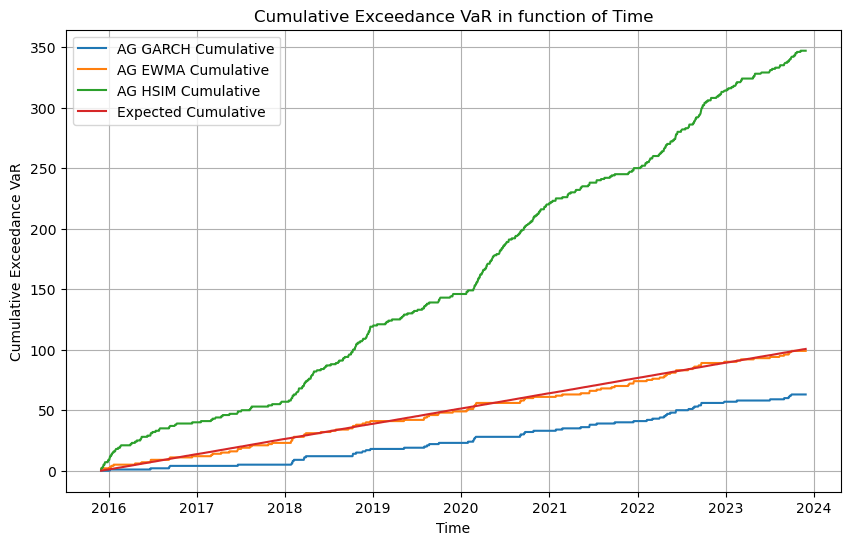

In [86]:


df_var_exc_aug['cumulative_AG_GARCH'] = df_var_exc_aug['AG_GARCH'].cumsum()
df_var_exc_aug['cumulative_AG_EWMA'] = df_var_exc_aug['AG_EWMA'].cumsum()
df_var_exc_aug['cumulative_AG_HSIM'] = df_var_exc_aug['AG_HSIM'].cumsum()


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_var_exc_aug['cumulative_AG_GARCH'], label='AG GARCH Cumulative')
plt.plot(df_var_exc_aug['cumulative_AG_EWMA'], label='AG EWMA Cumulative')
plt.plot(df_var_exc_aug['cumulative_AG_HSIM'], label='AG HSIM Cumulative')
plt.plot(df_var_exc_aug['expected'], label='Expected Cumulative')


# Customize the plot
plt.xlabel('Time')
plt.ylabel('Cumulative Exceedance VaR')
plt.title('Cumulative Exceedance VaR in function of Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Calculation of Metrics

Volatility / Sharpe Ratio / VaR / ES / Risk Decomposition

- Volatility

In [ ]:
def volatility(dataframe):
    return dataframe.std()

- Sharpe Ratio

In [16]:
def sharpe_ratio(returns, risk_free_rate):

    mean_return = np.mean(returns)
    std_return = np.std(returns)

    # Calculate the excess return
    excess_return = mean_return - risk_free_rate

    # Calculate the Sharpe Ratio
    sharpe_ratio = excess_return / std_return

    return sharpe_ratio

- VaR

In [67]:
def var(dataframe, confidence_level):
    
    #Calculate the historical VaR:
    var=np.percentile(dataframe, confidence_level)
    
    return var

- Expected Shortfall

In [76]:
def expected_shortfall(returns, confidence_level):
    sorted_returns = np.sort(returns)
    n = len(sorted_returns)
    cutoff_index = int((1-confidence_level) * n)
    shortfall_returns = sorted_returns[:cutoff_index]
    expected_shortfall = np.mean(shortfall_returns)
    return expected_shortfall

- Risk Decomposition

In [77]:
def risk_decomposition(returns, weights):

    cov_matrix = np.cov(returns, rowvar=False)
    portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    asset_contributions = np.multiply(weights**2, np.diag(cov_matrix))
    total_risk = np.sqrt(portfolio_var)
    contribution_percentages = asset_contributions / portfolio_var
    return total_risk, asset_contributions, contribution_percentages